## BAI 1

In [9]:
import pandas as pd
data = pd.read_csv('housing.csv')
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Cau 1

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

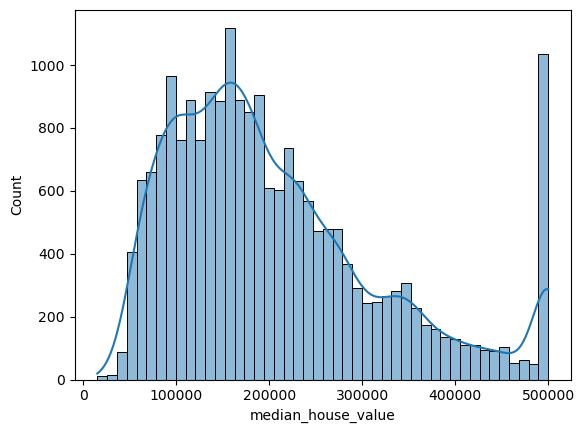

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['median_house_value'], kde=True)

Cau 2

In [11]:
data.shape

(20640, 10)

In [12]:
#count the number of arributes
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Cau 3

In [13]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Cau 4

<AxesSubplot:>

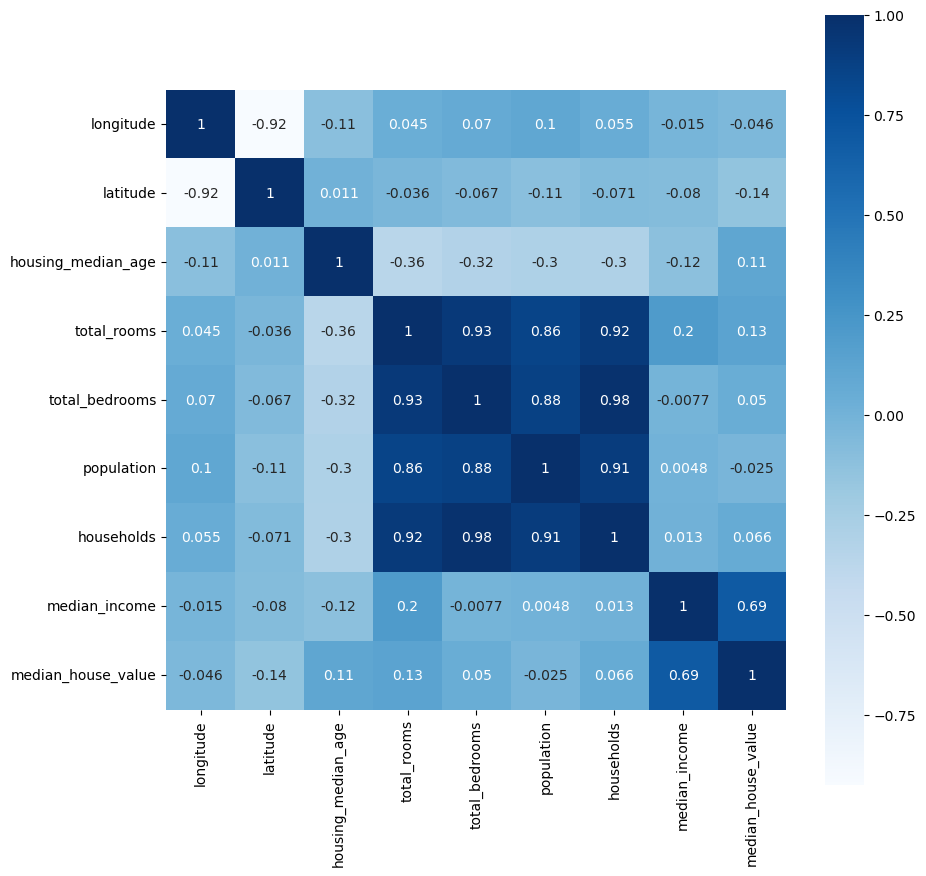

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# tinh su phu thuoc cua tung thuoc tinh
correlation = data.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

=> median_income 

Cau 4

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

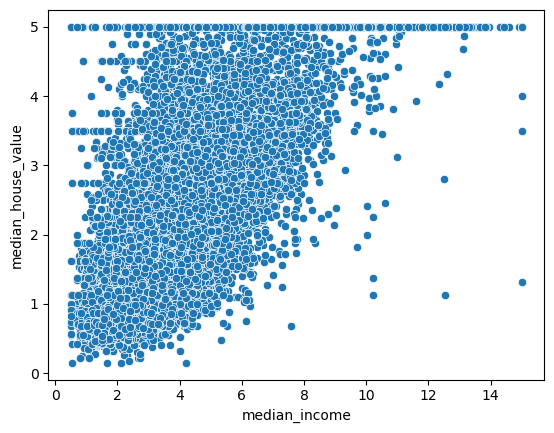

In [15]:
X_train = data['median_income']
y_train = data['median_house_value']
y_train_transformed = y_train / 100000.0
data_visualize = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")

Cau 5

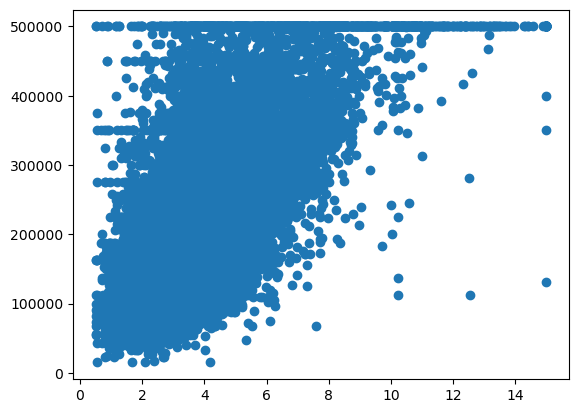

In [16]:
# scatter plot of median_income and median_house_value
X=data['median_income']
y=data['median_house_value']
plt.scatter(X,y)

Cau 6

In [17]:
#divine data into training and testing (8:2)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
X_train

7774     0.9946
5984     6.2089
7425     1.8641
20625    4.1250
9829     3.7454
          ...  
9945     6.8000
3257     3.1250
18108    7.8383
8811     6.5704
2697     3.5735
Name: median_income, Length: 16512, dtype: float64

In [19]:
X_test.shape

(4128,)

In [20]:
y_train.shape

(16512,)

In [21]:
y_test.shape

(4128,)

Cau 7

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train_transformed)

LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test.values.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred, squared =True)


88.26456439193322

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

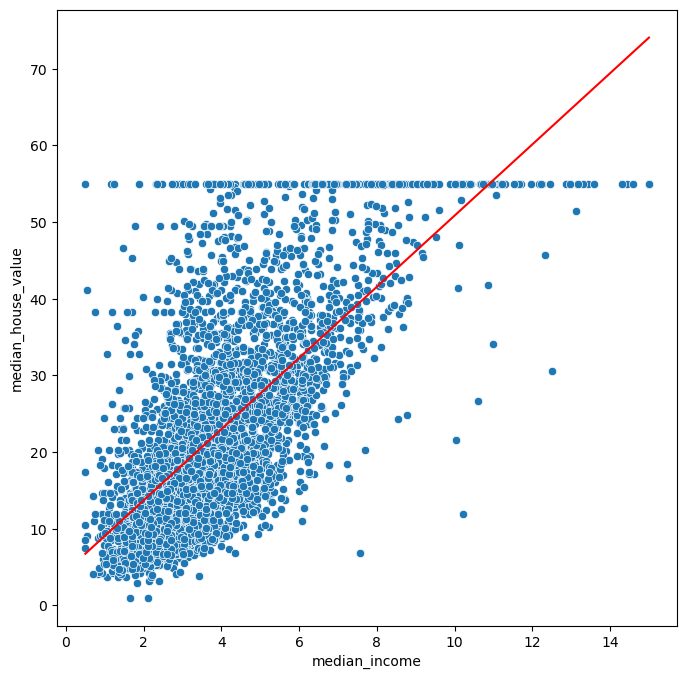

In [25]:
import seaborn as sns
test_true = pd.DataFrame({'median_income':X_test, 'median_house_value':y_test_transformed})
test_pred = pd.DataFrame({'median_income':X_test, 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income",y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income",y="median_house_value")

## BAI 2

In [62]:
#predict price of house base in total_bedrooms
#process null values using simple imputer
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
X2 = data['total_bedrooms']
X_processed = imputer.fit_transform(X2.values.reshape(-1,1))[:,0]
#MAKE X_processed like X2
X_processed = pd.Series(X_processed)
X_processed = X_processed.astype('float64')
from sklearn.model_selection import train_test_split
X2_train,X2_test,y_train,y_test=train_test_split(X_processed,y,test_size=0.2)

In [63]:
X_processed

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Length: 20640, dtype: float64

In [64]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X2_train.values.reshape(-1,1), y_train_transformed)


LinearRegression()

In [65]:
from sklearn.metrics import mean_squared_error
y_pred2 = model2.predict(X2_test.values.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred2, squared =True)


171.96815461427175

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

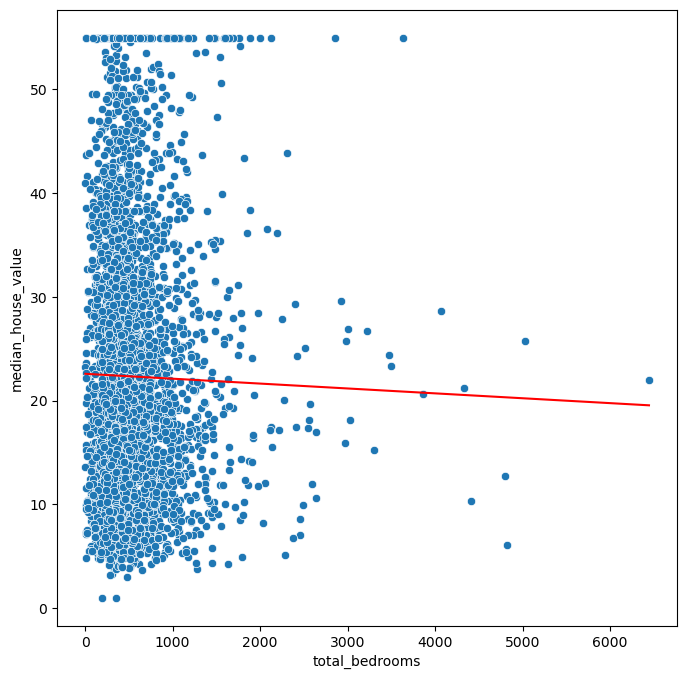

In [66]:
import seaborn as sns
test_true2 = pd.DataFrame({'total_bedrooms':X2_test, 'median_house_value':y_test_transformed})
test_pred2 = pd.DataFrame({'total_bedrooms':X2_test, 'median_house_value': y_pred2})
fig2= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred2, x="total_bedrooms",y="median_house_value", color='red')
sns.scatterplot(data=test_true2, x="total_bedrooms",y="median_house_value")

In [69]:
#evaluate model1 and model2 using cross validation with 5 folds
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(model, X_train.values.reshape(-1,1), y_train_transformed, cv=5, scoring='neg_mean_squared_error')
scores2 = cross_val_score(model2, X2_train.values.reshape(-1,1), y_train_transformed, cv=5, scoring='neg_mean_squared_error')
print(scores1)
print(scores2)

[-83.41057903 -87.35714473 -88.21044505 -84.16110192 -89.96241852]
[-160.90210078 -158.44911204 -163.19653068 -167.74488729 -166.43589104]


So sánh kết quả: kết quả khi dự đoán bằng median_income có giá trị gần đúng hơn so với kết quả khi dự đoán bằng total_bedrooms

BAI 3:

In [94]:
# multiple linear regression model using 2 attributes median_income and total_bedrooms
X3 = pd.concat([X, X_processed], axis=1)

from sklearn.model_selection import train_test_split
X3_train,X3_test,y_train,y_test=train_test_split(X3,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X3_train, y_train_transformed)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [96]:
#predict using model3 with cross validation with n_splits = 10
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(model3, X3_train, y_train_transformed, cv=10, scoring='neg_mean_squared_error')
print(scores3)


[-159.69956345 -162.14357652 -153.84391732 -163.26225673 -163.89198817
 -162.74916333 -167.23275681 -168.67843182 -167.72562222 -165.29158506]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib

Nhận xét: sử dụng kết hợp 2 thuộc tính thì kết quả ra có độ chính xác cao hơn khi sử dụng biến total_bedrooms nhưng lại thấp hơn khi dùng biến median_income.

## BAI 4

In [97]:
# use ridge regression to predict with atrributes median_income
from sklearn.linear_model import Ridge
model4 = Ridge(alpha=0.1)
model4.fit(X_train.values.reshape(-1,1), y_train_transformed)

from sklearn.metrics import mean_squared_error
y_pred4 = model4.predict(X_test.values.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred4, squared =True)

88.26456669030627

Nhận xét: kết quả khá tương đồng khi sử dụng biến median_income để predict cho 2 mô hình trên.

## BAI 5

In [98]:
# use ramdom forest to predict with atrributes median_income, use girdsearchcv to find best parameters for model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model5 = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50]}
grid = GridSearchCV(model5, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train.values.reshape(-1,1), y_train_transformed)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
model5 = grid.best_estimator_
model5.fit(X_train.values.reshape(-1,1), y_train_transformed)

from sklearn.metrics import mean_squared_error
y_pred5 = model5.predict(X_test.values.reshape(-1,1))
mean_squared_error(y_test_transformed, y_pred5, squared =True)


KeyboardInterrupt: 